In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.integrate import quad
from scipy.integrate import odeint
import scipy.constants as cste

# Ex. 1

a)

In [7]:
B_0 = 400 * 1e-6 # T
R_j = 71492 * 1e3 # m

x = np.linspace(-R_j, +R_j, 100)
y = np.linspace(-R_j, +R_j, 100)

X, Y = np.meshgrid(x, y)

r = np.sqrt(X**2 + Y**2)
theta = np.arctan2(Y, X)

b)

In [9]:
alpha = np.deg2rad(-9.6)

B_r = -2 * B_0 * (R_j/r)**3 * np.cos(theta + alpha)
B_theta = -1 * B_0 * (R_j/r)**3 * np.sin(theta + alpha)
B_phi = 0 * r

B_norm = np.sqrt(B_r**2 + B_theta**2)

$$\left[\begin{array}{c}
\hat{\mathbf{x}} \\
\hat{\mathbf{y}} \\
\hat{\mathbf{z}}
\end{array}\right]=\left[\begin{array}{ccc}
\sin \theta \cos \phi & \cos \theta \cos \phi & -\sin \phi \\
\sin \theta \sin \phi & \cos \theta \sin \phi & \cos \phi \\
\cos \theta & -\sin \theta & 0
\end{array}\right]\left[\begin{array}{l}
\hat{\boldsymbol{r}} \\
\hat{\boldsymbol{\theta}} \\
\hat{\boldsymbol{\phi}}
\end{array}\right]$$

here it seems we consider $\theta$ to be the azimuthal angle, not $\phi$

$\vec{e_{\theta}}$ is orthogonal to the xOy plane, so I'm guessing we are plotting in the xOz plane ?

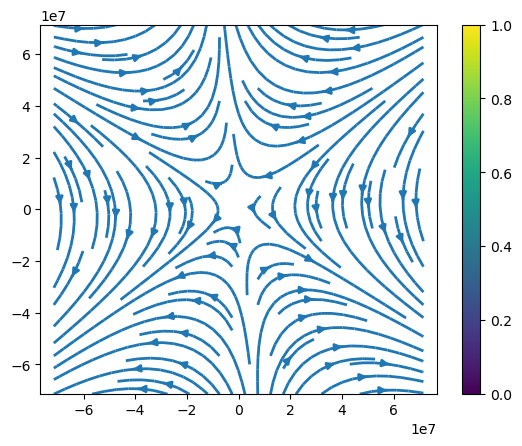

In [39]:
# phi = 0
B_x = np.sin(theta)*B_r + np.cos(theta)*B_theta
B_y = np.cos(theta)*B_r - np.sin(theta)*B_theta

fig0, ax0 = plt.subplots()
strm = ax0.streamplot(X, Y, B_x, B_y, linewidth=2, cmap=plt.cm.jet)
fig0.colorbar(strm.lines)
plt.axis('equal')
plt.show()

c)

don't know what I did here

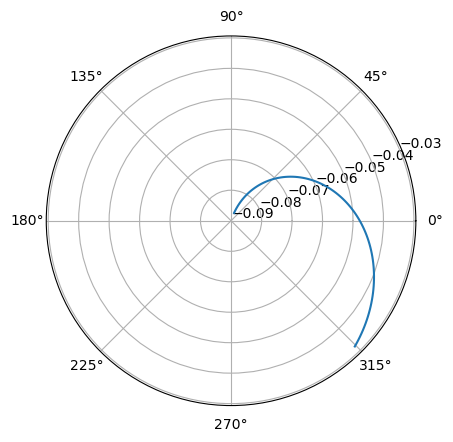

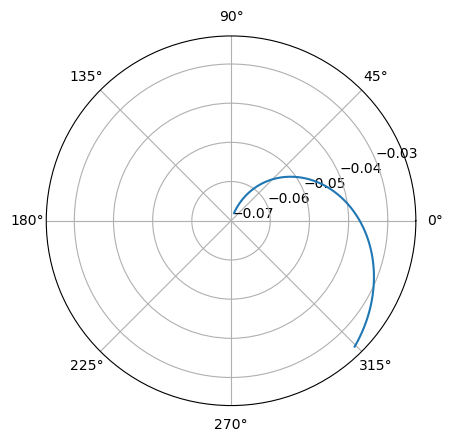

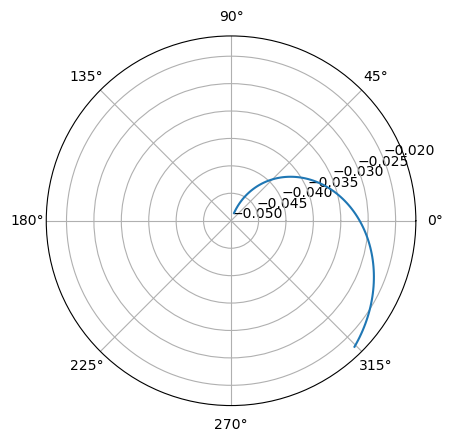

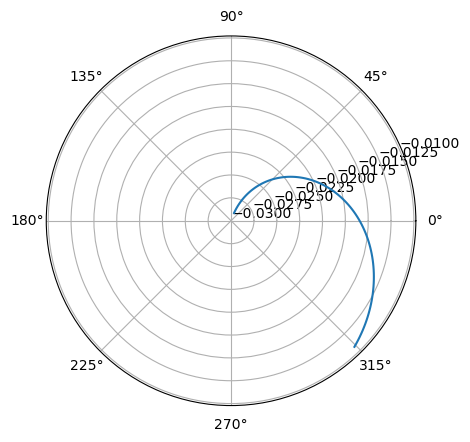

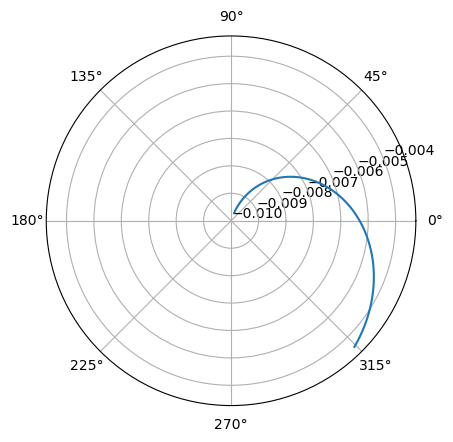

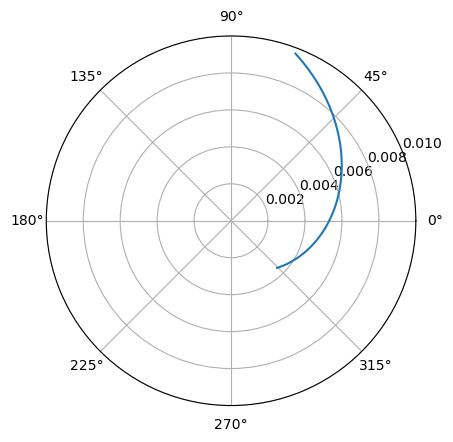

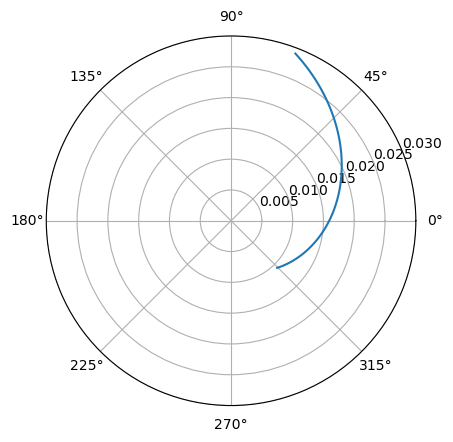

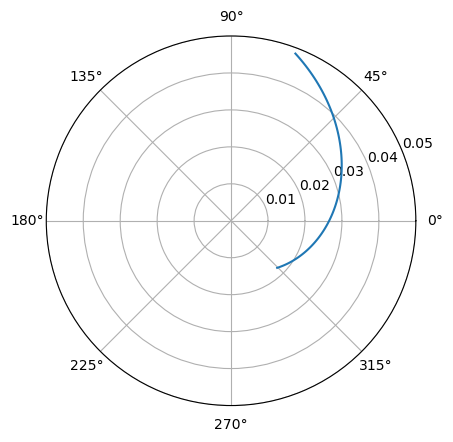

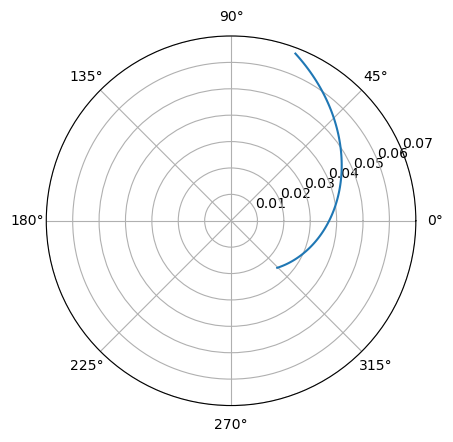

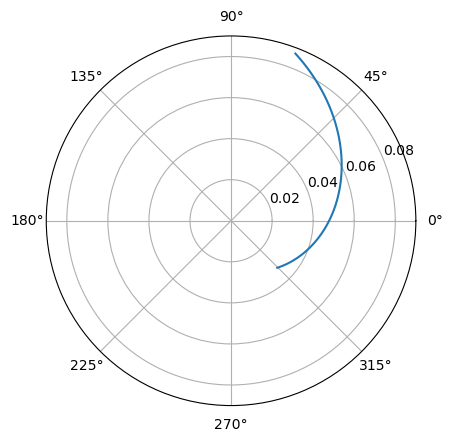

In [54]:
def mag_field_lines(X, t, R_j):
    r, theta = X

    Br = -2*(R_j/r)**2 * np.cos(theta)
    Btheta = -(R_j/r)**3 * np.sin(theta)

    return [Br, Btheta]


u_mag = np.linspace(0, 1, 100)
# initial conditions
CI = np.array([[R_j, theta0] for theta0 in np.linspace(np.deg2rad(-5), np.deg2rad(5), 10)])
for X_ini in CI:
    X = odeint(mag_field_lines, X_ini, u_mag, args=(R_j,))
    x, y = X.T
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.plot(x, y)
plt.show()

# Ex. 2

In [12]:
def g(f, f_0, delta_f):
    return np.exp( -((f-f_0)/delta_f)**2 )

f_0 = 1
delta_f = 0.1
c = 1

t_min = 0
t_max = 10

x_min = 0
x_max = 20

t_domain = np.linspace(t_min, t_max, 200)
x_domain = np.linspace(x_min, x_max, 200)

non-dispersif

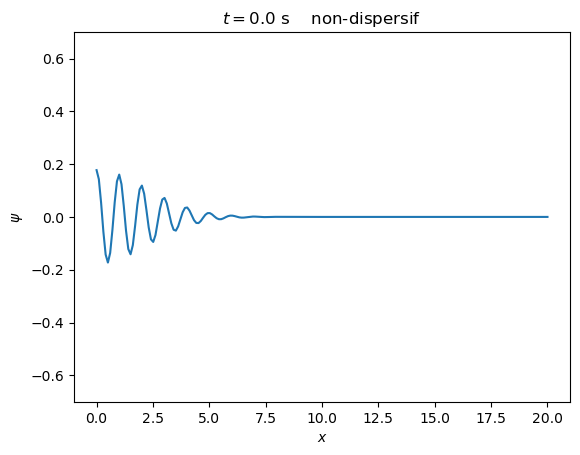

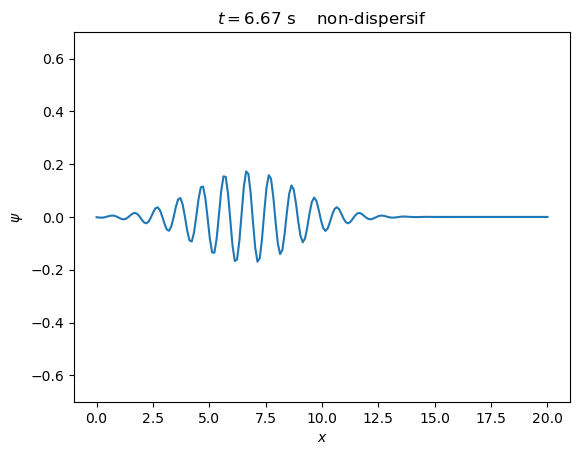

In [16]:
N = 100
f_min, f_max = 0, 2*f_0
f_domain = np.linspace(f_min, f_max, N)

df = f_domain[1]-f_domain[0]
for t in [0., 6.67]:
#t_1 = 0

    phi_1 = np.zeros(len(x_domain))
    for i in range(len(x_domain)):
        x = x_domain[i]
        for j in range(len(f_domain)):
            f = f_domain[j]
            phi_1[i] += g(f, f_0, delta_f)*np.cos(2*np.pi*f*(t - x/c))*df


    plt.plot(x_domain, phi_1)
    plt.title(f"$t={t}$ s    non-dispersif")
    plt.xlabel("$x$")
    plt.ylabel("$\psi$")
    plt.ylim((-0.7, 0.7))
    plt.show()



dispersif
$\omega = k^2$

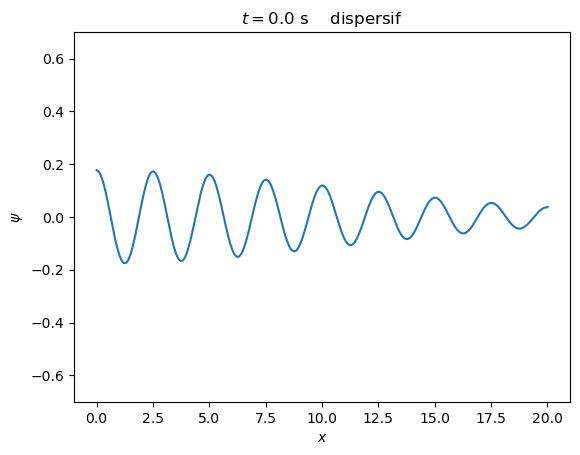

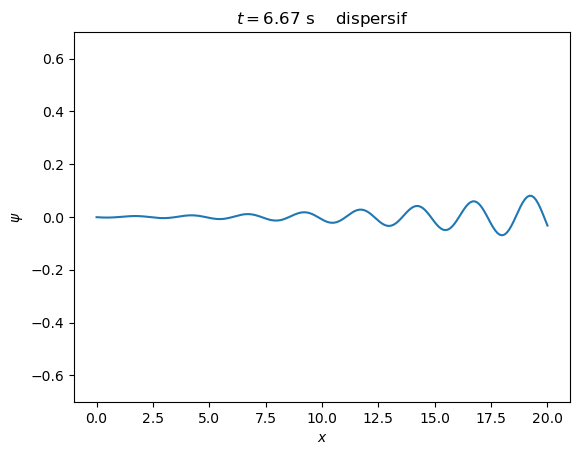

In [18]:
for t in [0., 6.67]:
#t_1 = 0

    phi_1 = np.zeros(len(x_domain))
    for i in range(len(x_domain)):
        x = x_domain[i]
        for j in range(len(f_domain)):
            f = f_domain[j]
            k = np.sqrt(2*np.pi*f)
            phi_1[i] += g(f, f_0, delta_f)*np.cos(2*np.pi*f*t - k*x)*df


    plt.plot(x_domain, phi_1)
    plt.title(f"$t={t}$ s    dispersif")
    plt.xlabel("$x$")
    plt.ylabel("$\psi$")
    plt.ylim((-0.7, 0.7))
    plt.show()

b)

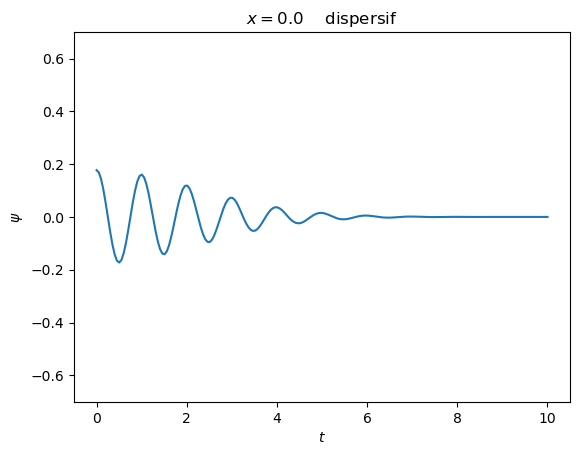

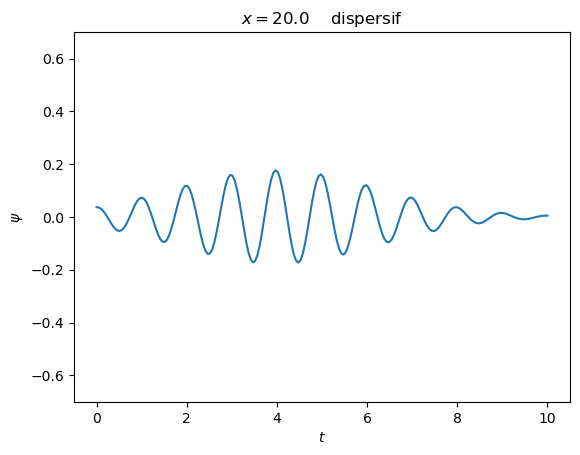

In [25]:
for x in [0., 20.]:
#t_1 = 0

    phi_1 = np.zeros(len(x_domain))
    for i in range(len(t_domain)):
        t = t_domain[i]
        for j in range(len(f_domain)):
            f = f_domain[j]
            k = np.sqrt(2*np.pi*f)
            phi_1[i] += g(f, f_0, delta_f)*np.cos(2*np.pi*f*t - k*x)*df


    plt.plot(t_domain, phi_1)
    plt.title(f"$x={x}$    dispersif")
    plt.xlabel("$t$")
    plt.ylabel("$\psi$")
    plt.ylim((-0.7, 0.7))
    plt.show()

c)

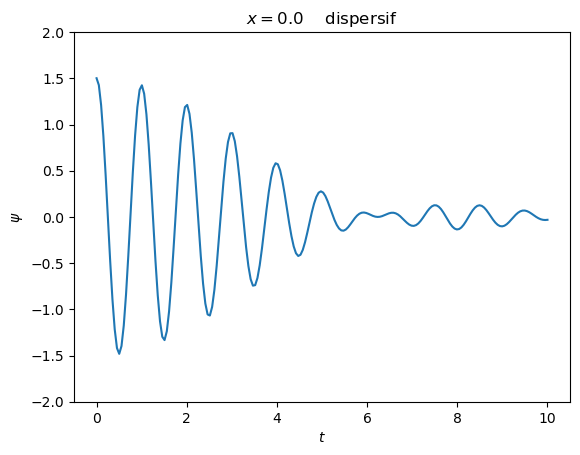

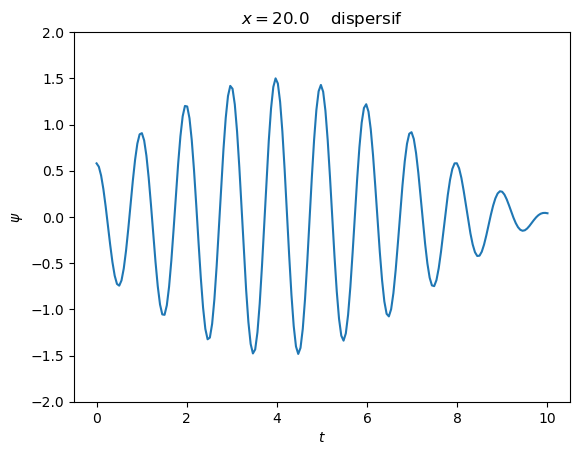

In [31]:
f_domain2 = np.linspace(0.9*f_0, 1.1*f_0, N)

for x in [0., 20.]:
#t_1 = 0

    phi_1 = np.zeros(len(x_domain))
    for i in range(len(t_domain)):
        t = t_domain[i]
        for j in range(len(f_domain2)):
            f = f_domain2[j]
            k = np.sqrt(2*np.pi*f)
            phi_1[i] += g(f, f_0, delta_f)*np.cos(2*np.pi*f*t - k*x)*df


    plt.plot(t_domain, phi_1)
    plt.title(f"$x={x}$    dispersif")
    plt.xlabel("$t$")
    plt.ylabel("$\psi$")
    plt.ylim((-2, 2))
    plt.show()

Questions bonus

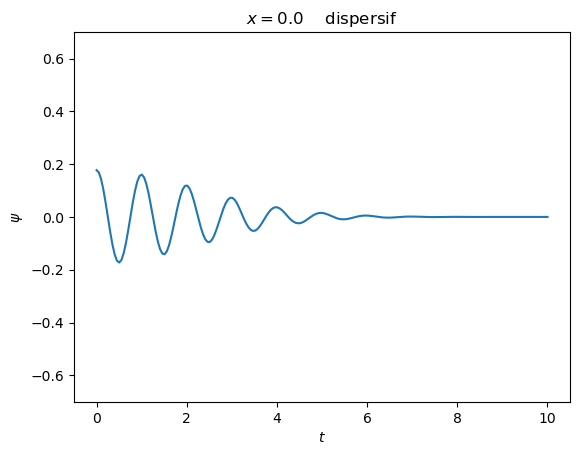

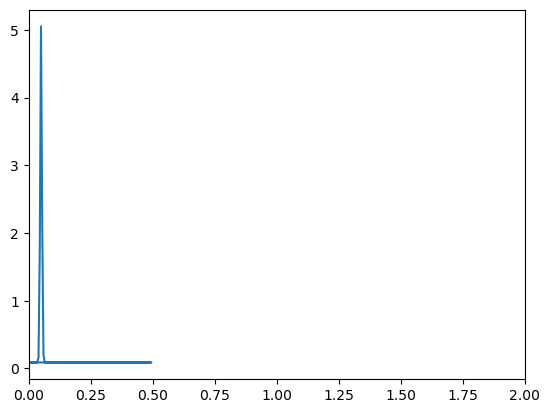

In [47]:
for x in [0.]:
#t_1 = 0

    phi_1 = np.zeros(len(x_domain))
    for i in range(len(t_domain)):
        t = t_domain[i]
        for j in range(len(f_domain)):
            f = f_domain[j]
            k = np.sqrt(2*np.pi*f)
            phi_1[i] += g(f, f_0, delta_f)*np.cos(2*np.pi*f*t - k*x)*df


    plt.plot(t_domain, phi_1)
    plt.title(f"$x={x}$    dispersif")
    plt.xlabel("$t$")
    plt.ylabel("$\psi$")
    plt.ylim((-0.7, 0.7))
    plt.show()

    # Fourier transform
    sig_1_fft = np.fft.fft(phi_1)
    freq_domain = np.fft.fftfreq(len(t_domain))
    plt.plot(freq_domain, sig_1_fft.real)
    plt.xlim(0, 2*f_0)
    plt.show()

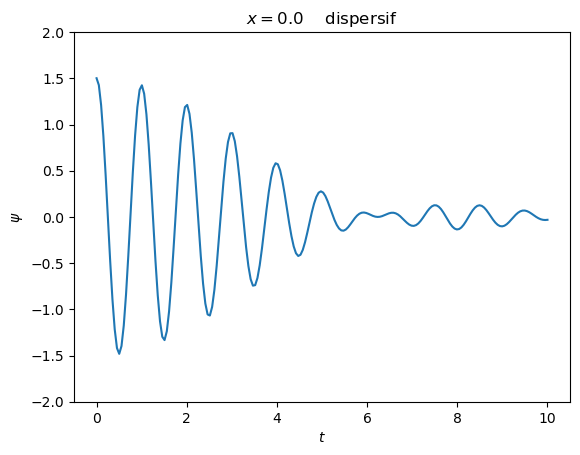

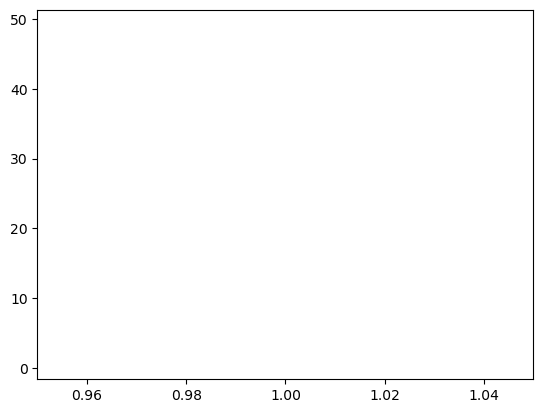

In [49]:
for x in [0.]:
#t_1 = 0

    phi_1 = np.zeros(len(x_domain))
    for i in range(len(t_domain)):
        t = t_domain[i]
        for j in range(len(f_domain)):
            f = f_domain2[j]
            k = np.sqrt(2*np.pi*f)
            phi_1[i] += g(f, f_0, delta_f)*np.cos(2*np.pi*f*t - k*x)*df


    plt.plot(t_domain, phi_1)
    plt.title(f"$x={x}$    dispersif")
    plt.xlabel("$t$")
    plt.ylabel("$\psi$")
    plt.ylim((-2, 2))
    plt.show()

    # Fourier transform
    sig_1_fft = np.fft.fft(phi_1)
    freq_domain = np.fft.fftfreq(len(t_domain))
    plt.plot(freq_domain, sig_1_fft.real)
    plt.xlim(0.95*f_0, 1.05*f_0)
    plt.show()